In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load data
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

# Prepare text vectorization
max_tokens = 10000  # Maximum number of words to keep
max_sequence_length = 100  # Maximum length of text sequences

text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

# Adapt the vectorizer to the training data
text_vectorizer.adapt(train_df['text'].values)

# Convert labels to numeric
label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

# Prepare datasets
x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

In [3]:
### Variasi 1: 1 RNN Layer
model_1 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3600 - loss: 1.1102 - val_accuracy: 0.3600 - val_loss: 1.0838
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4833 - loss: 1.0211 - val_accuracy: 0.3400 - val_loss: 1.1237
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5481 - loss: 0.9252 - val_accuracy: 0.3600 - val_loss: 1.1740
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8352 - loss: 0.6847 - val_accuracy: 0.3800 - val_loss: 1.2168
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9331 - loss: 0.4668 - val_accuracy: 0.4000 - val_loss: 1.3140
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9846 - loss: 0.2603 - val_accuracy: 0.3700 - val_loss: 1.4364
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9873 - loss: 0.1220 - val_accuracy: 0.4200 - val_loss: 1.5954
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9996 - loss: 0.0514 - val_accuracy: 0.3600 - val_loss: 1.7930
Epoch 9/20


In [4]:
### Variasi 2: 2 RNN Layers
model_2 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3510 - loss: 1.1442 - val_accuracy: 0.4800 - val_loss: 1.0272
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4348 - loss: 1.0568 - val_accuracy: 0.4400 - val_loss: 1.1006
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4780 - loss: 0.9818 - val_accuracy: 0.5000 - val_loss: 0.9975
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6714 - loss: 0.8011 - val_accuracy: 0.4900 - val_loss: 1.0884
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8138 - loss: 0.5831 - val_accuracy: 0.4500 - val_loss: 1.2336
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9189 - loss: 0.3656 - val_accuracy: 0.4900 - val_loss: 1.3143
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9759 - loss: 0.1374 - val_accuracy: 0.5000 - val_loss: 1.4827
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9990 - loss: 0.0465 - val_accuracy: 0.4600 - val_loss: 1.7617


In [5]:
### Variasi 3: 3 RNN Layers
model_3 = Sequential([
    Embedding(max_tokens, 128, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.3399 - loss: 1.2010 - val_accuracy: 0.3800 - val_loss: 1.0909
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3426 - loss: 1.1436 - val_accuracy: 0.3800 - val_loss: 1.0834
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3368 - loss: 1.1065 - val_accuracy: 0.2600 - val_loss: 1.1315
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3967 - loss: 1.0871 - val_accuracy: 0.3900 - val_loss: 1.0731
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4556 - loss: 1.0337 - val_accuracy: 0.4400 - val_loss: 1.0994
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6176 - loss: 0.8840 - val_accuracy: 0.4000 - val_loss: 1.1952
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7122 - loss: 0.7392 - val_accuracy: 0.4400 - val_loss: 1.2682
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8477 - loss: 0.4788 - val_accuracy: 0.4000 - val_loss: 1.5186



Evaluating Model 1 (1 RNN Layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.49      0.55      0.52        38
           1       0.31      0.38      0.34        24
           2       0.32      0.24      0.27        38

    accuracy                           0.39       100
   macro avg       0.37      0.39      0.38       100
weighted avg       0.38      0.39      0.38       100

Macro F1-score: 0.3770


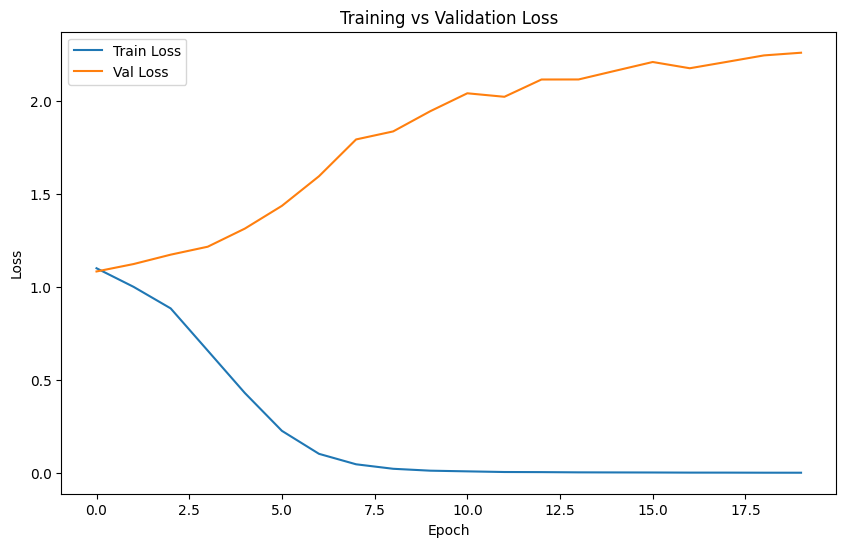


Evaluating Model 2 (2 RNN Layers):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.56      0.71      0.63        38
           1       0.37      0.46      0.41        24
           2       0.50      0.29      0.37        38

    accuracy                           0.49       100
   macro avg       0.48      0.49      0.47       100
weighted avg       0.49      0.49      0.48       100

Macro F1-score: 0.4673


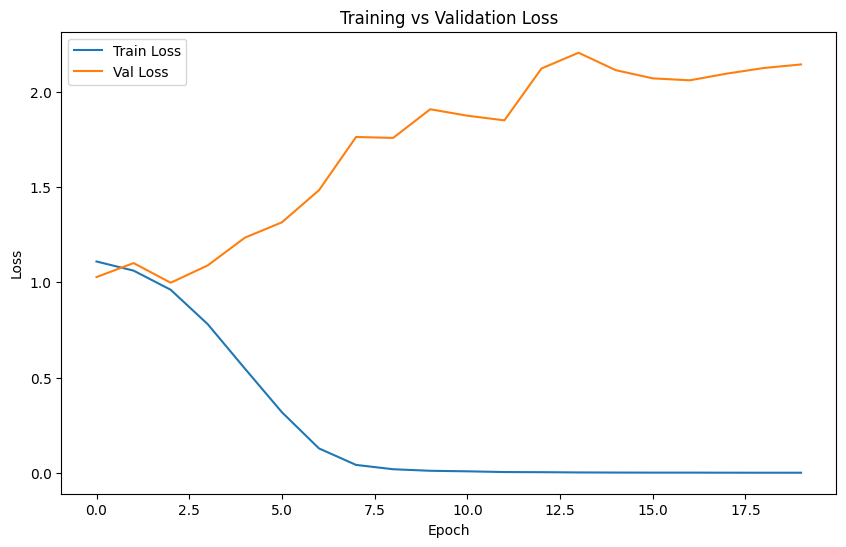


Evaluating Model 3 (3 RNN Layers):
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x317554310> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
              precision    recall  f1-score   support

           0       0.49      0.63      0.55        38
           1       0.59      0.42      0.49        24
     

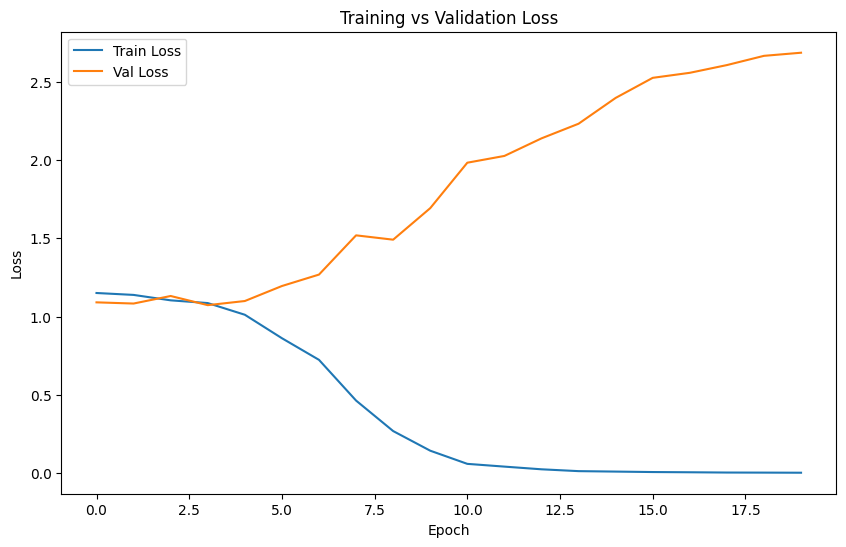

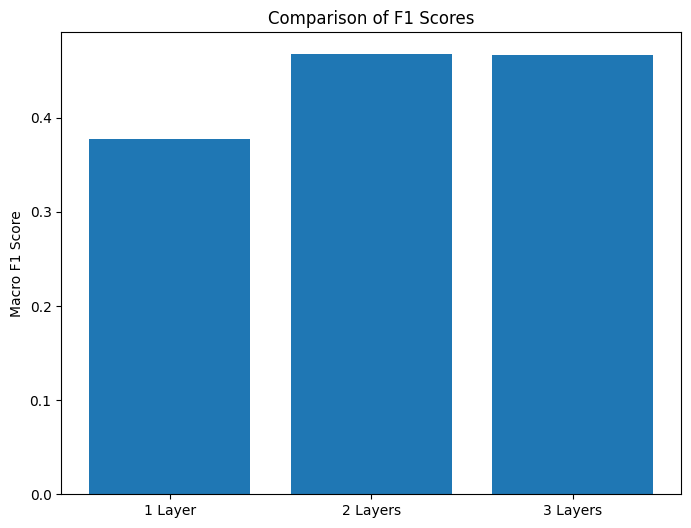

In [6]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

# Evaluate all models
print("\nEvaluating Model 1 (1 RNN Layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

print("\nEvaluating Model 2 (2 RNN Layers):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

print("\nEvaluating Model 3 (3 RNN Layers):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

# Compare F1 scores
plt.figure(figsize=(8, 6))
plt.bar(['1 Layer', '2 Layers', '3 Layers'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show() 